In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 3 - Les Tris

## III. Le tri fusion

Il s'agit d'un tri imaginé par John Von Neumann en 1945 basé sur la stratégie "diviser pour régner". On va ici découpé le problème en problèmes plus petits jusqu'à ce qu'ils soient faciles à résoudre (ici obtenir de slistes de taille 1 triées) puis on combine les résultats pour obtenir la solution du problème initial. C'est un algorthme de tri efficace avec une complexité en O(n log n)


L'algorithme du tri fusion peut s'écrire ainsi:
1. On découpe laliste àtrier en deux parties
2. On applique le tri fusion sur la partie de gauche
3. On applique le tri fusion sur la partie de droite
4. On fusionne les deux listes triées obtenues

![operations tri fusion](Merge_sort.svg)

Voici une petite vidéo pour vous donner une idée de l'algorithme.

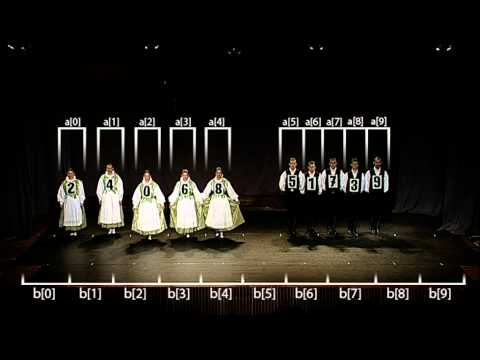

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("XaqR3G_NVoo",width="640px", height="315px")


### Activité à réaliser
1. Proposer une fonction **fusion_iter** iterative qui fusionne deux listes triées en une liste triée.
2. Meme question pour une fonction **fusion_rec** recursive.
3. Proposez une implémentation du tri-fusion.
4. Réalisez une étude de son temps d'exécution. Sa complexité en O(n log n) vous parait elle vérifiées ?

In [5]:
# 1.
def fusion_iter(L1, L2):
    """
    réalise la fusion en version itérative
    de deux listes triées L1 et L2
    """
    assert type(L1) == list
    assert type(L2) == list
    L = [] # on initialise une liste vide qui sera la liste finale
    while L1 != [] and L2 != []: # tant qu'il reste des éléments dans les deux listes on a des comparaisons à faire
        if L1[0] < L2[0]:
            L.append(L1.pop(0)) # deux opérations
                                # on enlève l'élément d'indice 0 de L1
                                # et on l'ajoute à L
        else:
            L.append(L2.pop(0)) # idem dans le cas ou L2[0] est le plus petit
    
    return L + L1 + L2 # on renvoie la concaténation de la liste construite et de la seule qui contient encore des éléments
                       # L1 ou L2 est vide à ce moment là

In [6]:
fusion_iter([1,4,5], [2,3,6,7]) # un petit test avec L1 et L2 triées

[1, 2, 3, 4, 5, 6, 7]

In [7]:
# 2.
def fusion_rec(L1, L2):
    """
    réalise la fusion en version récursive
    de deux listes triées L1 et L2
    """
    assert type(L1) == list
    assert type(L2) == list
    if L1 == [] or L2 == []: # si une est vide, on renvoie l'autre. C'est la condition d'arrêt
        return L1 + L2
    else:
        if L1[0] < L2[0]:
            return L1[:1] + fusion_rec(L1[1:], L2) # on renvoie la concaténation du début de L1 et de la fusion du reste
        else:
            return L2[:1] + fusion_rec(L1, L2[1:]) # idem pour L2

In [8]:
fusion_rec([1,4,5], [2,3,6,7]) # un petit test avec L1 et L2 triées

[1, 2, 3, 4, 5, 6, 7]

In [9]:
# 3.
def tri_fusion(L):
    n = len(L)
    if n <= 1:
        return L # si la taille de la liste est 1 ou 0, on a une liste triée, condition d'arrêt
    else:
        return fusion_iter(tri_fusion(L[:n//2]), tri_fusion(L[n//2:])) # sinon on renvoie la fusion de la première moitié de L
                                                                        # triée par tri_fusion et de la deuxième moitié de L
                                                                        # triée par tri_fusion

In [10]:
from random import randint
L = [randint(0,100) for i in range(10)]
print(L)
tri_fusion(L)

[53, 77, 25, 90, 18, 4, 50, 80, 71, 81]


[4, 18, 25, 50, 53, 71, 77, 80, 81, 90]

4.
On récupère les fonctions **melange** et **trace** du TD précédent afin de voir l'impact de la taille de la liste sur le temps d'exécution

In [11]:
def melange(n,p):
    L = [i+1 for i in range(n)]
    for i in range(p):
        a = randint(0,n-1)
        b = randint(0,n-1)
        L[a], L[b] = L[b], L[a]
    return L

In [12]:
import matplotlib.pyplot as plt
from time import *

def trace(f, n, p):
    L = melange(n, p)
    listes = [L[:(i*n)//16] for i in range(1,17)]
    x = [(i*n)//16 for i in range(1,17)]
    y = []
    for i in range(16):
        temps = 0
        for j in range(5):
            l = listes[i][:]
            t = time()
            f(l)
            t = time() -t
            if t < temps or temps == 0:
                temps = t
        y.append(temps)
    plt.plot(x,y,"+")
    plt.show()

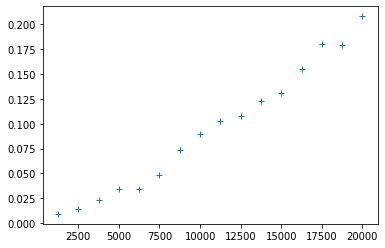

In [13]:
trace(tri_fusion,20000,20000) # tri d'une liste bien mélangée

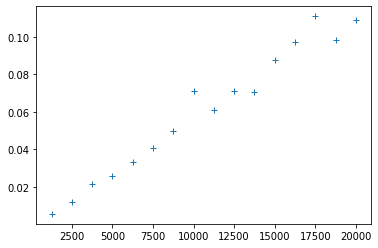

In [14]:
trace(tri_fusion,20000,2) # tri d'une liste peu mélangé
                        # Temps d'exécution du même ordre de grandeur

In [22]:
def chrono(f, n, p):
    L = melange(n, p)
    listes = [L[:(i*n)//16] for i in range(1,17)]
    x = [(i*n)//16 for i in range(1,17)]
    y = []
    for i in range(16):
        temps = 0
        for j in range(5):
            l = listes[i][:]
            t = time()
            f(l)
            temps += time() -t
        temps = temps / 5.
        y.append(temps)
    return x,y

In [25]:
x,y = chrono(tri_fusion,50000,10000)

1.1443836368864362e-06


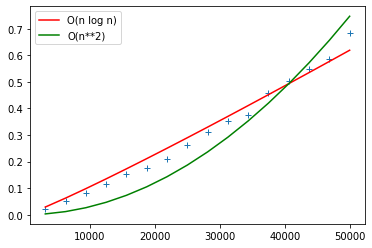

In [26]:
from scipy.optimize import curve_fit
from math import log2
import numpy as np

def f(x,a):
    return a*x*np.log(x)

def g(x,a):
    return a*x**2

params,cov = curve_fit(f,x,y)
params2,cov2 = curve_fit(g,x,y)
y2 = [f(val,*params) for val in x]
y3 = [g(val,*params2) for val in x]
print(*params)
plt.plot(x,y,"+")
plt.plot(x,y2,"r-",label="O(n log n)")
plt.plot(x,y3,"g-",label="O(n**2)")
plt.legend()
plt.show()